In [1]:
import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt

In [33]:
df_anage = pl.read_csv("../data/anage.csv", infer_schema_length=1000)
df_earthquakes = pl.read_csv("../data/EarthquakesChile_2000-2024.csv", try_parse_dates=True).with_columns(
    Year=pl.col("Date").dt.year(),
    Month=pl.col("Date").dt.month()
)

In [3]:
df_anage.head()

HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),Male maturity (days),Gestation/Incubation (days),Weaning (days),Litter/Clutch size,Litters/Clutches per year,Inter-litter/Interbirth interval,Birth weight (g),Weaning weight (g),Adult weight (g),Growth rate (1/days),Maximum longevity (yrs),Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
i64,str,str,str,str,str,str,str,str,i64,i64,i64,str,f64,f64,i64,f64,str,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,str
3,"""Animalia""","""Arthropoda""","""Branchiopoda""","""Diplostraca""","""Daphniidae""","""Daphnia""","""pulicaria""","""Daphnia""",null,null,null,null,null,null,null,null,null,null,null,0.19,null,"""unknown""","""medium""","""acceptable""",null,null,null,null,null,"""1294,1295,1296"""
5,"""Animalia""","""Arthropoda""","""Insecta""","""Diptera""","""Drosophilidae""","""Drosophila""","""melanogaster""","""Fruit fly""",7,7,null,null,null,null,null,null,null,null,null,0.3,null,"""captivity""","""large""","""acceptable""",0.05,0.04,null,null,null,"""2,20,32,47,53,68,69,240,241,24…"
6,"""Animalia""","""Arthropoda""","""Insecta""","""Hymenoptera""","""Apidae""","""Apis""","""mellifera""","""Honey bee""",null,null,null,null,null,null,null,null,null,null,null,8.0,"""812""","""unknown""","""medium""","""acceptable""",null,null,null,null,null,"""63,407,408,741,805,806,808,812…"
8,"""Animalia""","""Arthropoda""","""Insecta""","""Hymenoptera""","""Formicidae""","""Cardiocondyla""","""obscurior""","""Cardiocondyla obscurior""",null,null,null,null,null,null,null,null,null,null,null,0.5,"""1293""","""captivity""","""medium""","""acceptable""",null,null,null,null,null,"""1293"""
9,"""Animalia""","""Arthropoda""","""Insecta""","""Hymenoptera""","""Formicidae""","""Lasius""","""niger""","""Black garden ant""",null,null,null,null,null,null,null,null,null,null,null,28.0,"""411""","""unknown""","""medium""","""acceptable""",null,null,null,null,null,"""411,813,814"""


In [4]:
df_earthquakes.head()

UTC_Date,Profoundity_Km,Magnitude_Ml,Date,Hour,Location,Region,Latitude,Longitude
datetime[μs],f64,f64,date,time,str,str,f64,f64
2024-03-01 16:35:22,243.0,2.9,2024-03-01,13:35:22,"""45 km al SE de Socaire""","""Antofagasta""",-23.958,-67.698
2024-03-01 15:41:03,259.0,3.6,2024-03-01,12:41:03,"""57 km al E de Socaire""","""Antofagasta""",-23.8,-67.375
2024-03-01 08:27:13,26.0,2.9,2024-03-01,05:27:13,"""33 km al S de Huasco""","""Atacama""",-28.755,-71.288
2024-03-01 08:22:21,54.0,3.7,2024-03-01,05:22:21,"""49 km al SO de Huasco""","""Atacama""",-28.822,-71.52
2024-03-01 07:12:58,20.0,2.9,2024-03-01,04:12:58,"""16 km al SE de Los Vilos""","""Coquimbo""",-31.991,-71.376


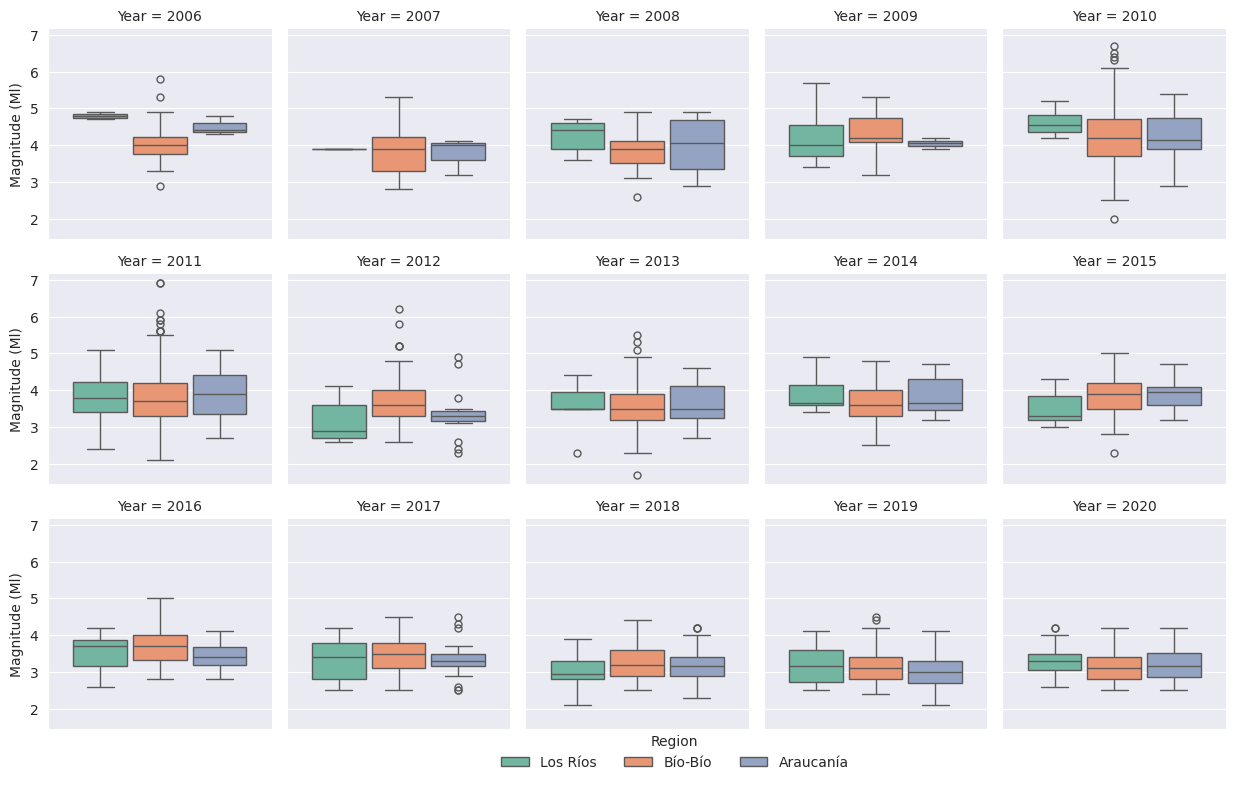

In [32]:
with sns.axes_style("darkgrid"):
    g = sns.catplot(
        df_earthquakes.filter(
            pl.col("Year").is_between(2006, 2020),
            pl.col("Region").is_in(["Bío-Bío", "Araucanía", "Los Ríos"])
        ),
        kind="box",
        y="Magnitude_Ml",
        hue="Region",
        col="Year",
        col_wrap=5,
        height=2.5,
        aspect=1,
        gap=0.1,
        palette="Set2",
        sharey=True
    )
    g.set_ylabels("Magnitude (Ml)")
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.5, -0.05), ncol=3)

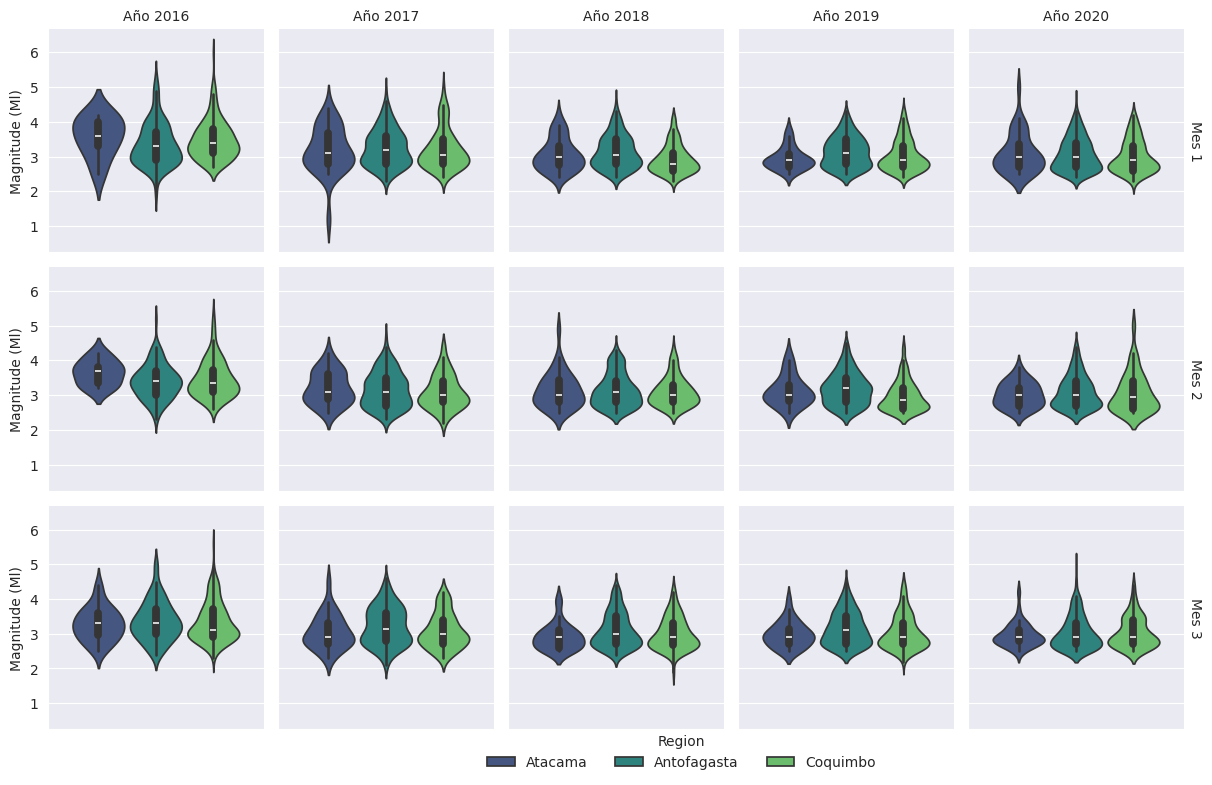

In [50]:
with sns.axes_style("darkgrid"):
    g = sns.catplot(
        df_earthquakes.filter(
            pl.col("Year").is_between(2016, 2020),
            pl.col("Month") <= 3,
            pl.col("Region").is_in(["Atacama", "Coquimbo", "Antofagasta"])
        ),
        kind="violin",
        y="Magnitude_Ml",
        hue="Region",
        col="Year",
        row="Month",
        height=2.5,
        aspect=1,
        gap=0.1,
        palette="viridis",
        sharey=True,
        sharex=True,
        margin_titles=True,
    )
    g.set_ylabels("Magnitude (Ml)")
    g.set_titles(col_template="Año {col_name}", row_template="Mes {row_name}")
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.5, -0.05), ncol=3)

Text(0.5, 1.02, 'Sismos de Chile en 2010')

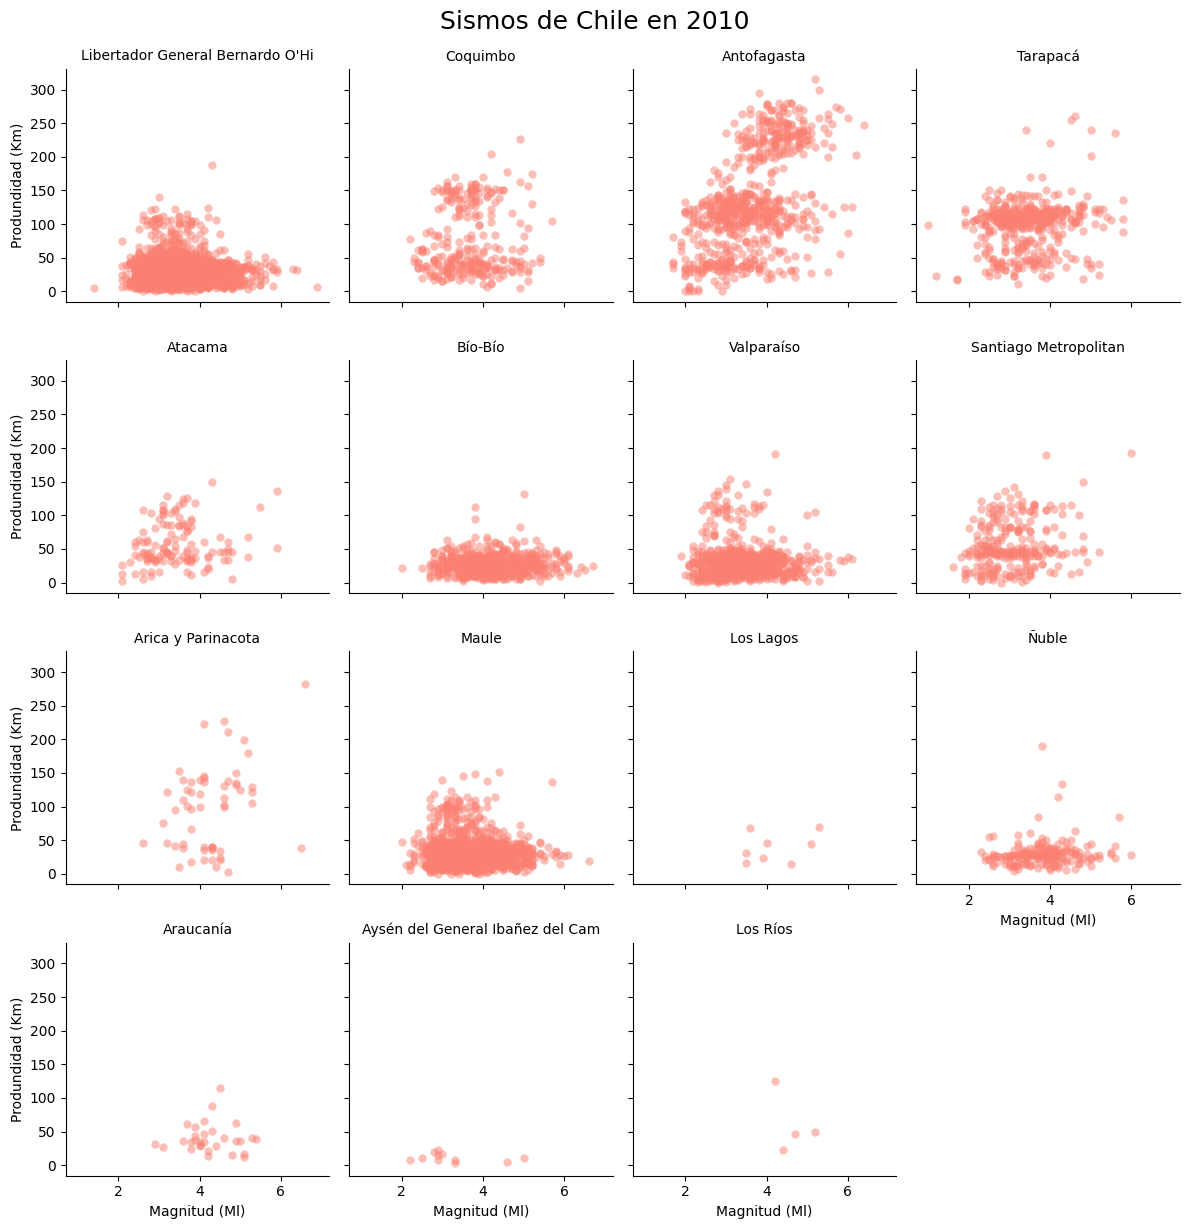

In [62]:
g = sns.relplot(
    data=df_earthquakes.filter(Year=2010),
    x="Magnitude_Ml",
    y="Profoundity_Km",
    col="Region",
    col_wrap=4,
    height=3,
    alpha=0.5,
    linewidth=0,
    color="salmon"
)
g.set_ylabels("Produndidad (Km)")
g.set_xlabels("Magnitud (Ml)")
g.set_titles(col_template="{col_name}")

g.figure.suptitle("Sismos de Chile en 2010", y=1.02, fontsize=18)

Text(0.5, 1.02, 'Sismos de Chile en 2010')

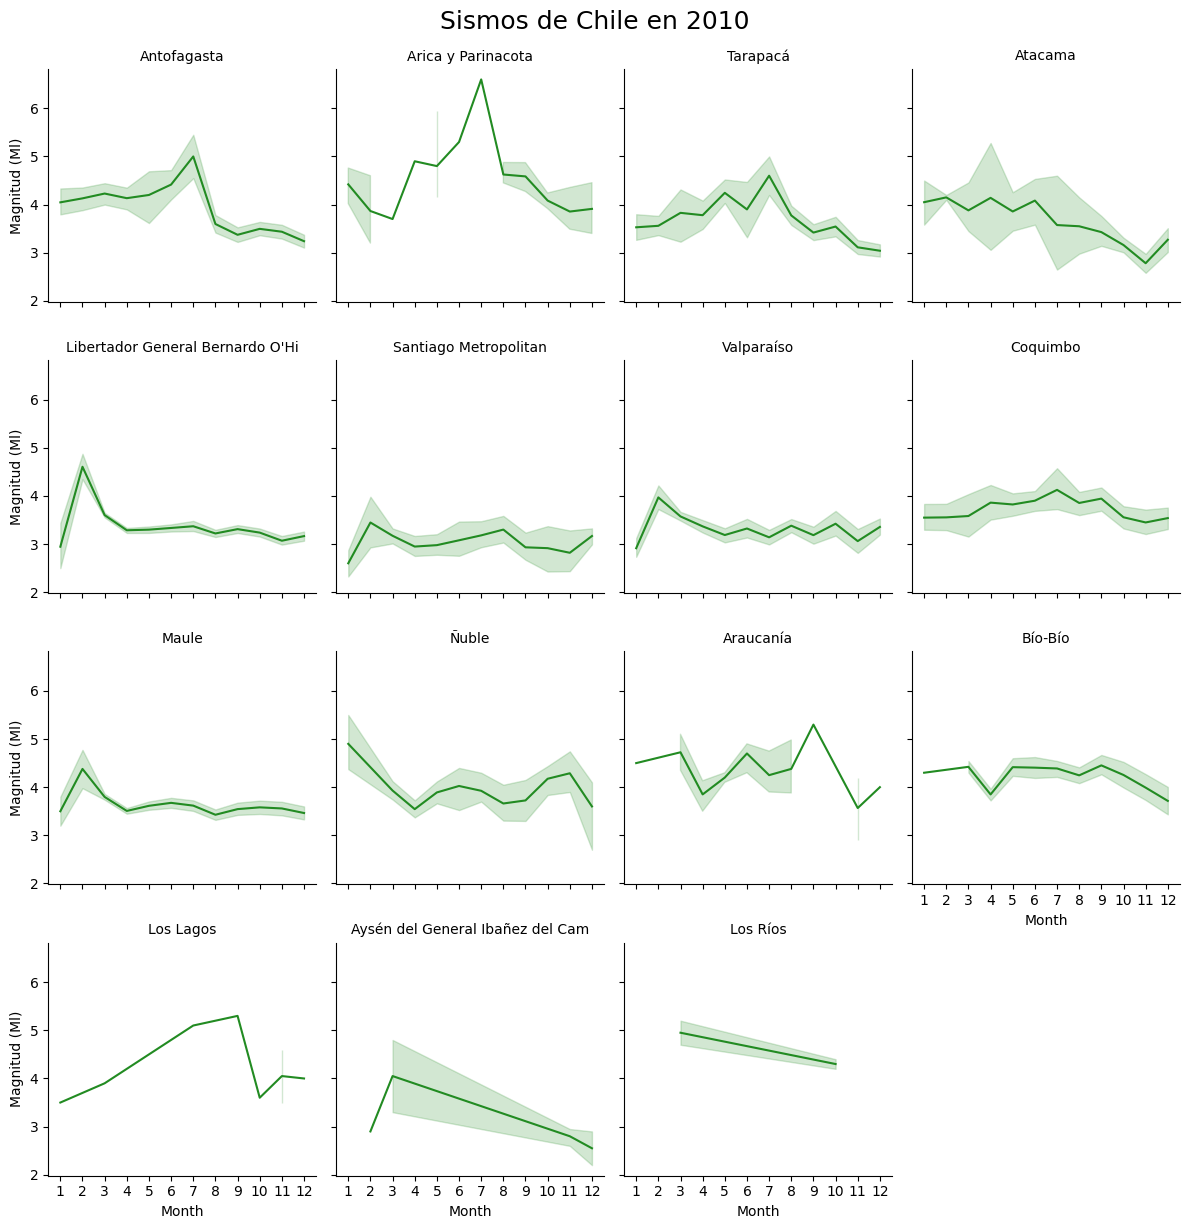

In [70]:
g = sns.relplot(
    data=df_earthquakes.filter(Year=2010).sort("Month").with_columns(
        pl.col("Month").cast(pl.String)
    ),
    kind="line",
    y="Magnitude_Ml",
    x="Month",
    col="Region",
    col_wrap=4,
    height=3,
    aspect=1,
    color="ForestGreen"
)
g.set_ylabels("Magnitud (Ml)")
g.set_titles(col_template="{col_name}")
# g.set_xticklabels()

g.figure.suptitle("Sismos de Chile en 2010", y=1.02, fontsize=18)

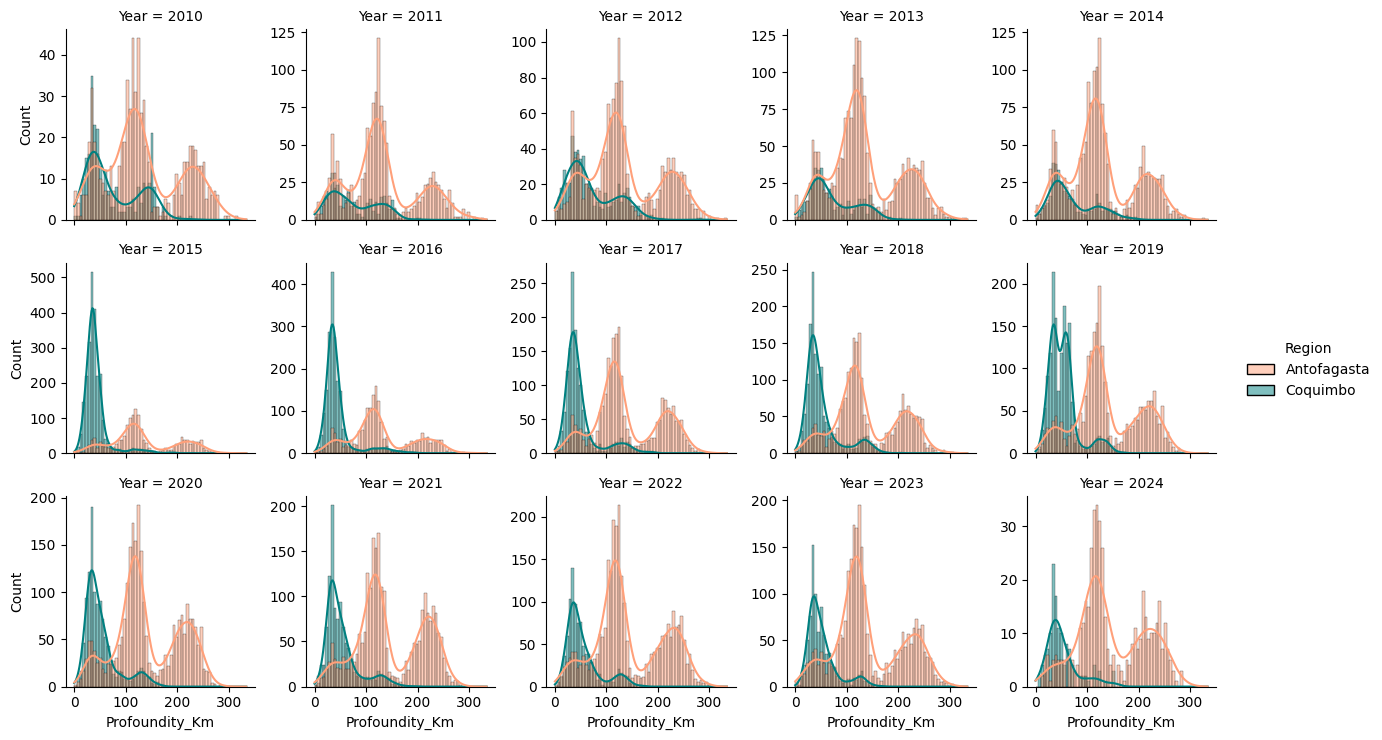

In [89]:
sns.displot(
    data=df_earthquakes.filter(
        pl.col("Year").is_between(2010, 2024),
        pl.col("Region").is_in(["Antofagasta", "Coquimbo"]),
    ),
    kind="hist",
    x="Profoundity_Km",
    hue="Region",
    col="Year",
    col_wrap=5,
    height=2.5,
    kde=True,
    palette=["lightsalmon", "teal"],
    facet_kws=dict(sharey=False),
)

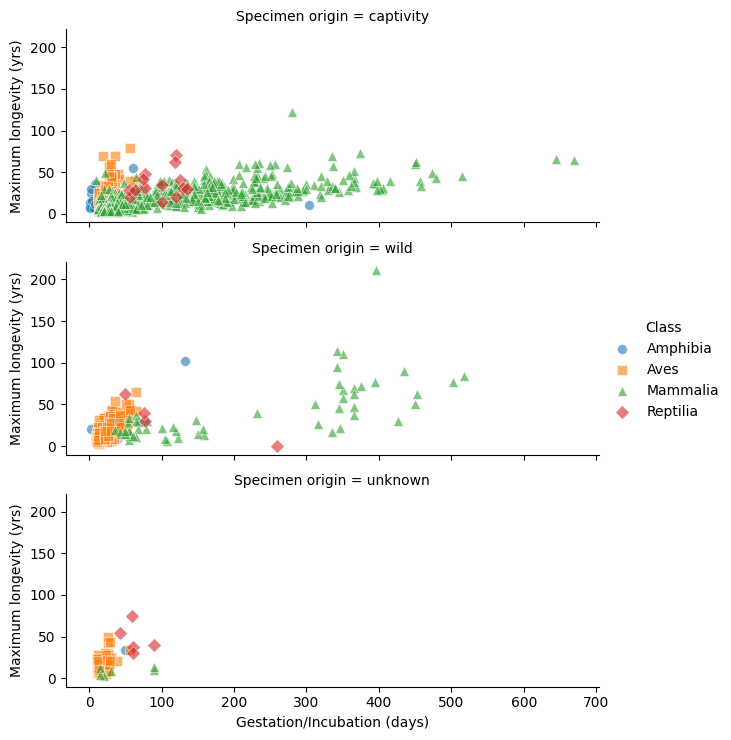

In [103]:
g = sns.FacetGrid(
    data=df_anage.filter(
        pl.col("Class").is_in(["Mammalia", "Aves", "Reptilia", "Amphibia"])
    ),
    row="Specimen origin",
    hue="Class",
    hue_kws=dict(marker=["o", "s", "^", "D"]),
    height=2.5,
    aspect=2.5,
)
g.map(
    sns.scatterplot,
    "Gestation/Incubation (days)",
    "Maximum longevity (yrs)",
    alpha=0.6,
    s=50,
)
g.add_legend()

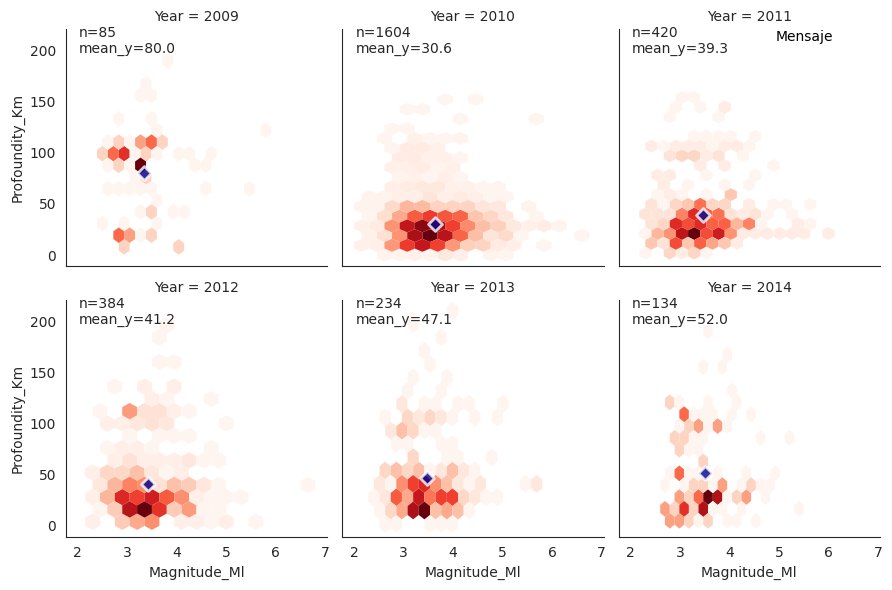

In [133]:
def hexbix_custom(x, y, **kwargs):
    hb = plt.hexbin(x, y, gridsize=15, cmap="Reds", linewidths=0, mincnt=1, **kwargs)

    mean_y=y.mean()
    mean_x=x.mean()

    plt.scatter(
        mean_x,
        mean_y,
        s=50,
        c="darkblue",
        marker="D",
        edgecolors="white",
        linewidths=2,
        alpha=0.8,
    )

    plt.text(
        0.05,
        0.9,
        f"n={len(x)}\nmean_y={mean_y:.1f}",
        transform=plt.gca().transAxes,
    )

    return hb

with sns.axes_style("white"):
    g = sns.FacetGrid(
        data=df_earthquakes.filter(
            pl.col("Region") == "Maule",
            pl.col("Year").is_between(2009, 2014),
        ),
        col="Year",
        col_wrap=3,
    )
    g.map(hexbix_custom, "Magnitude_Ml", "Profoundity_Km")

for year, ax in zip(g.col_names, g.axes):
    if year == 2011:
        ax.text(
            0.6,
            0.95,
            "Mensaje",
            transform=ax.transAxes,
        )